In [2]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv("dataset_crudo.csv")

# Eliminar columna 'Unnamed: 0' si existe
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

#redondear las columnas numéricas 
for col in df.select_dtypes(include=['float64']).columns:
    df[col] = df[col].round(2)
# Mostrar las nuevas columnas

# Limpiar 'Kilómetros': quitar ' km', puntos y convertir a float
df['Kilómetros'] = df['Kilómetros'].astype(str).str.replace('.', '', regex=False)
df['Kilómetros'] = df['Kilómetros'].str.replace(' km', '', regex=False)
df['Kilómetros'] = pd.to_numeric(df['Kilómetros'], errors='coerce')

In [3]:
# Primero normalizamos los valores de moneda
df['Moneda'] = df['Moneda'].replace({'$': 'peso', 'U$S': 'dolar'})

# Tasa de conversión
PESO_A_DOLAR = 1165

# Crear nueva columna con el precio en dólares
df['Precio_usd'] = df.apply(
    lambda row: row['Precio'] / PESO_A_DOLAR if row['Moneda'] == 'peso' else row['Precio'],
    axis=1
)

# Eliminar las columnas originales de 'Precio' y 'Moneda'
df = df.drop(columns=['Precio', 'Moneda'])

# Mostrar las primeras filas para verificar
df.head()

,Marca,Modelo,Año,Versión,Color,Tipo de combustible,Puertas,Transmisión,Motor,Tipo de carrocería,Con cámara de retroceso,Kilómetros,Título,Descripción,Tipo de vendedor,Precio_usd
0,Ford,Ecosport,2020.0,1.5 Freestyle 123cv 4x2,Blanco,Nafta,5.0,Manual,1.5,SUV,No,640000,Ford Ecosport 1.5 Freestyle 123cv 4x2,Descubre nuestro impresionante Ford Eco Sport ...,concesionaria,17596.566524
1,Volkswagen,Tiguan,2024.0,LIFE 350 TSI 4M,Negro,Nafta,5.0,Automática secuencial,2.0 L 230 CV 350 TSI,SUV,Sí,0,Tiguan Life 350 Tsi 4m Ar,AUTOTAG S.A. Concesionario Oficial N°1 Volkswa...,tienda,48068.583691
2,Volkswagen,Tiguan Allspace,2019.0,1.4 Tsi Trendline 150cv Dsg,Negro,Nafta,5.0,Automática,1.4,SUV,NaN,653000,Volkswagen Tiguan Allspace 1.4 Tsi Trendline 1...,-HERMOSA TIGUAN 1.4 TSI DSG-MANTENIMIENTO/SERV...,particular,28300.000000
3,Ford,Ecosport,2017.0,1.5 Titanium 123Cv 4X2,Blanco,Nafta,5.0,Manual,1.5,SUV,NaN,768980,Ford Ecosport 1.5 Titanium 123Cv 4X2,"En GRUPO RANDAZZO, tenemos el auto que estas b...",tienda,17244.635193
4,Jeep,Compass,2021.0,2.4 Sport At,NaN,Nafta,5.0,Automática,2.4,SUV,NaN,1090000,Jeep Compass 2.4 Sport At,•Unico dueño•Todos los services oficiales•Bate...,particular,23000.000000


In [4]:
mapeo_marcas = {
    'Rrenault': 'Renault',
    'hiunday': 'Hyundai',
    'Hiunday': 'Hyundai',
    'Hiuanday': 'Hyundai',
    'D-S': 'DS',
    'DS AUTOMOBILES': 'DS',
    'Land Rover': 'LandRover',
    'Range Rover': 'LandRover',
    'D.S': 'DS',
    'D·S': 'DS',
    'D.S.' : 'DS',
    'Vol': 'Volkswagen'
}
df['Marca'] = df['Marca'].str.strip().replace(mapeo_marcas)

def one_hot_encode_marca(df):
    dummies = pd.get_dummies(df['Marca'], prefix='Marca', drop_first=False, dtype=int)
    df = pd.concat([df.drop(columns=['Marca']), dummies], axis=1)
    return df

df = one_hot_encode_marca(df)
pd.set_option('display.max_columns', None)
# Mostrar las primeras filas para verificar
df.head(100)


,Modelo,Año,Versión,Color,Tipo de combustible,Puertas,Transmisión,Motor,Tipo de carrocería,Con cámara de retroceso,Kilómetros,Título,Descripción,Tipo de vendedor,Precio_usd,Marca_Alfa Romeo,Marca_Audi,Marca_BAIC,Marca_BMW,Marca_Chery,Marca_Chevrolet,Marca_Citroën,Marca_DS,Marca_Daihatsu,Marca_Dodge,Marca_Fiat,Marca_Ford,Marca_GWM,Marca_Haval,Marca_Honda,Marca_Hyundai,Marca_Isuzu,Marca_JAC,Marca_Jaguar,Marca_Jeep,Marca_Jetour,Marca_Jetur,Marca_KAIYI,Marca_Kia,Marca_LandRover,Marca_Lexus,Marca_Lifan,Marca_Mercedes-Benz,Marca_Mini,Marca_Mitsubishi,Marca_Nissan,Marca_Peugeot,Marca_Porsche,Marca_Renault,Marca_SsangYong,Marca_Subaru,Marca_Suzuki,Marca_Toyota,Marca_Volkswagen,Marca_Volvo
0,Ecosport,2020.0,1.5 Freestyle 123cv 4x2,Blanco,Nafta,5.0,Manual,1.5,SUV,No,640000,Ford Ecosport 1.5 Freestyle 123cv 4x2,Descubre nuestro impresionante Ford Eco Sport ...,concesionaria,17596.566524,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Tiguan,2024.0,LIFE 350 TSI 4M,Negro,Nafta,5.0,Automática secuencial,2.0 L 230 CV 350 TSI,SUV,Sí,0,Tiguan Life 350 Tsi 4m Ar,AUTOTAG S.A. Concesionario Oficial N°1 Volkswa...,tienda,48068.583691,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,Tiguan Allspace,2019.0,1.4 Tsi Trendline 150cv Dsg,Negro,Nafta,5.0,Automática,1.4,SUV,NaN,653000,Volkswagen Tiguan Allspace 1.4 Tsi Trendline 1...,-HERMOSA TIGUAN 1.4 TSI DSG-MANTENIMIENTO/SERV...,particular,28300.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,Ecosport,2017.0,1.5 Titanium 123Cv 4X2,Blanco,Nafta,5.0,Manual,1.5,SUV,NaN,768980,Ford Ecosport 1.5 Titanium 123Cv 4X2,"En GRUPO RANDAZZO, tenemos el auto que estas b...",tienda,17244.635193,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Compass,2021.0,2.4 Sport At,NaN,Nafta,5.0,Automática,2.4,SUV,NaN,1090000,Jeep Compass 2.4 Sport At,•Unico dueño•Todos los services oficiales•Bate...,particular,23000.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Corolla Cross,2024.0,1.8 Hev Xei Ecvt,Gris,Híbrido/Nafta,5.0,Automática,1.8,SUV,NaN,160000,Toyota Corolla Cross 1.8 Hev Xei Ecvt,El vendedor no incluyó una descripción del pro...,concesionaria,37682.403433,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
96,Kicks,2021.0,1.6 Exclusive Cvt,Blanco,Nafta,5.0,Automática,1.6,SUV,NaN,450000,Nissan Kicks 1.6 Exclusive Cvt,El vendedor no incluyó una descripción del pro...,particular,27467.811159,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
97,X1,2017.0,2.0 Sdrive 20i Sportline 192cv,Gris,Nafta,5.0,Manual,2.0,SUV,Sí,470000,BMW X1 2.0 Sdrive 20i Sportline 192cv,Vehículo en excelente estado tanto interior co...,concesionaria,33500.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
98,Wrangler,2016.0,3.6 Sport 284hp Mtx,Negro,Nafta,3.0,Manual,3.6,SUV,NaN,850000,Jeep Wrangler 3.6 Sport 284hp Mtx,Jeep Wrangler Sport 3ptas 2016.- 85.000 Km.- 3...,particular,58000.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
import re
#traccion
def extraer_traccion(version):
    version = str(version).upper()

    if "4X4" in version:
        return "4x4"
    elif "4X2" in version:
        return "4x2"
    elif "AWD" in version:
        return "AWD"
    elif "FWD" in version:
        return "FWD"
    elif "RWD" in version:
        return "RWD"
    elif "4M" in version:
        return "4M"
    elif "2WD" in version:
        return "2WD"
    else:
        return "Desconocida"

def agregar_columna_traccion(df):
    df['Traccion'] = df['Versión'].apply(extraer_traccion)
    df = df.drop(columns=['Versión'])
    return df

df = agregar_columna_traccion(df)


df = pd.get_dummies(df, columns=['Traccion'], prefix='Traccion', dtype=int)
df.head()


df.head()

,Modelo,Año,Color,Tipo de combustible,Puertas,Transmisión,Motor,Tipo de carrocería,Con cámara de retroceso,Kilómetros,Título,Descripción,Tipo de vendedor,Precio_usd,Marca_Alfa Romeo,Marca_Audi,Marca_BAIC,Marca_BMW,Marca_Chery,Marca_Chevrolet,Marca_Citroën,Marca_DS,Marca_Daihatsu,Marca_Dodge,Marca_Fiat,Marca_Ford,Marca_GWM,Marca_Haval,Marca_Honda,Marca_Hyundai,Marca_Isuzu,Marca_JAC,Marca_Jaguar,Marca_Jeep,Marca_Jetour,Marca_Jetur,Marca_KAIYI,Marca_Kia,Marca_LandRover,Marca_Lexus,Marca_Lifan,Marca_Mercedes-Benz,Marca_Mini,Marca_Mitsubishi,Marca_Nissan,Marca_Peugeot,Marca_Porsche,Marca_Renault,Marca_SsangYong,Marca_Subaru,Marca_Suzuki,Marca_Toyota,Marca_Volkswagen,Marca_Volvo,Traccion_2WD,Traccion_4M,Traccion_4x2,Traccion_4x4,Traccion_AWD,Traccion_Desconocida,Traccion_FWD
0,Ecosport,2020.0,Blanco,Nafta,5.0,Manual,1.5,SUV,No,640000,Ford Ecosport 1.5 Freestyle 123cv 4x2,Descubre nuestro impresionante Ford Eco Sport ...,concesionaria,17596.566524,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,Tiguan,2024.0,Negro,Nafta,5.0,Automática secuencial,2.0 L 230 CV 350 TSI,SUV,Sí,0,Tiguan Life 350 Tsi 4m Ar,AUTOTAG S.A. Concesionario Oficial N°1 Volkswa...,tienda,48068.583691,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,Tiguan Allspace,2019.0,Negro,Nafta,5.0,Automática,1.4,SUV,NaN,653000,Volkswagen Tiguan Allspace 1.4 Tsi Trendline 1...,-HERMOSA TIGUAN 1.4 TSI DSG-MANTENIMIENTO/SERV...,particular,28300.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,Ecosport,2017.0,Blanco,Nafta,5.0,Manual,1.5,SUV,NaN,768980,Ford Ecosport 1.5 Titanium 123Cv 4X2,"En GRUPO RANDAZZO, tenemos el auto que estas b...",tienda,17244.635193,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Compass,2021.0,NaN,Nafta,5.0,Automática,2.4,SUV,NaN,1090000,Jeep Compass 2.4 Sport At,•Unico dueño•Todos los services oficiales•Bate...,particular,23000.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [6]:
# color
def agrupar_color(color):
    if pd.isna(color):
        return 'Desconocido'

    color = str(color).lower().strip()

    if any(x in color for x in ['gris', 'plata', 'plateado']):
        return 'Gris'
    elif any(x in color for x in ['blanco', 'blanca']):
        return 'Blanco'
    elif any(x in color for x in ['negro', 'negra', 'black', 'noir']):
        return 'Negro'
    else:
        return 'Color'
    

df['Color_grupo'] = df['Color'].apply(agrupar_color)

#contar la cantidad de cada color 
conteo_colores = df['Color_grupo'].value_counts()
print(conteo_colores)


df = pd.get_dummies(df, columns=['Color_grupo'], prefix='Color', dtype=int)
df = df.drop(columns=['Color'])
df.head()

Color_grupo
Gris           6961
Blanco         4824
Color          3245
Negro          2835
Desconocido     389
Name: count, dtype: int64


,Modelo,Año,Tipo de combustible,Puertas,Transmisión,Motor,Tipo de carrocería,Con cámara de retroceso,Kilómetros,Título,Descripción,Tipo de vendedor,Precio_usd,Marca_Alfa Romeo,Marca_Audi,Marca_BAIC,Marca_BMW,Marca_Chery,Marca_Chevrolet,Marca_Citroën,Marca_DS,Marca_Daihatsu,Marca_Dodge,Marca_Fiat,Marca_Ford,Marca_GWM,Marca_Haval,Marca_Honda,Marca_Hyundai,Marca_Isuzu,Marca_JAC,Marca_Jaguar,Marca_Jeep,Marca_Jetour,Marca_Jetur,Marca_KAIYI,Marca_Kia,Marca_LandRover,Marca_Lexus,Marca_Lifan,Marca_Mercedes-Benz,Marca_Mini,Marca_Mitsubishi,Marca_Nissan,Marca_Peugeot,Marca_Porsche,Marca_Renault,Marca_SsangYong,Marca_Subaru,Marca_Suzuki,Marca_Toyota,Marca_Volkswagen,Marca_Volvo,Traccion_2WD,Traccion_4M,Traccion_4x2,Traccion_4x4,Traccion_AWD,Traccion_Desconocida,Traccion_FWD,Color_Blanco,Color_Color,Color_Desconocido,Color_Gris,Color_Negro
0,Ecosport,2020.0,Nafta,5.0,Manual,1.5,SUV,No,640000,Ford Ecosport 1.5 Freestyle 123cv 4x2,Descubre nuestro impresionante Ford Eco Sport ...,concesionaria,17596.566524,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,Tiguan,2024.0,Nafta,5.0,Automática secuencial,2.0 L 230 CV 350 TSI,SUV,Sí,0,Tiguan Life 350 Tsi 4m Ar,AUTOTAG S.A. Concesionario Oficial N°1 Volkswa...,tienda,48068.583691,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
2,Tiguan Allspace,2019.0,Nafta,5.0,Automática,1.4,SUV,NaN,653000,Volkswagen Tiguan Allspace 1.4 Tsi Trendline 1...,-HERMOSA TIGUAN 1.4 TSI DSG-MANTENIMIENTO/SERV...,particular,28300.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3,Ecosport,2017.0,Nafta,5.0,Manual,1.5,SUV,NaN,768980,Ford Ecosport 1.5 Titanium 123Cv 4X2,"En GRUPO RANDAZZO, tenemos el auto que estas b...",tienda,17244.635193,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,Compass,2021.0,Nafta,5.0,Automática,2.4,SUV,NaN,1090000,Jeep Compass 2.4 Sport At,•Unico dueño•Todos los services oficiales•Bate...,particular,23000.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [7]:
#modelos
# 1. Top 20 modelos más comunes
top_modelos = df['Modelo'].value_counts().nlargest(20).index

# 2. Normalizar modelo (top 20 vs. Otro)
df['Modelo_normalizado'] = df['Modelo'].apply(lambda x: x if x in top_modelos else 'Otro')
df = df.drop('Modelo', axis=1)

# 3. One-hot encoding
df = pd.get_dummies(df, columns=['Modelo_normalizado'], prefix='Modelo', dtype=int)

df.head()

,Año,Tipo de combustible,Puertas,Transmisión,Motor,Tipo de carrocería,Con cámara de retroceso,Kilómetros,Título,Descripción,Tipo de vendedor,Precio_usd,Marca_Alfa Romeo,Marca_Audi,Marca_BAIC,Marca_BMW,Marca_Chery,Marca_Chevrolet,Marca_Citroën,Marca_DS,Marca_Daihatsu,Marca_Dodge,Marca_Fiat,Marca_Ford,Marca_GWM,Marca_Haval,Marca_Honda,Marca_Hyundai,Marca_Isuzu,Marca_JAC,Marca_Jaguar,Marca_Jeep,Marca_Jetour,Marca_Jetur,Marca_KAIYI,Marca_Kia,Marca_LandRover,Marca_Lexus,Marca_Lifan,Marca_Mercedes-Benz,Marca_Mini,Marca_Mitsubishi,Marca_Nissan,Marca_Peugeot,Marca_Porsche,Marca_Renault,Marca_SsangYong,Marca_Subaru,Marca_Suzuki,Marca_Toyota,Marca_Volkswagen,Marca_Volvo,Traccion_2WD,Traccion_4M,Traccion_4x2,Traccion_4x4,Traccion_AWD,Traccion_Desconocida,Traccion_FWD,Color_Blanco,Color_Color,Color_Desconocido,Color_Gris,Color_Negro,Modelo_2008,Modelo_C4 Cactus,Modelo_CR-V,Modelo_Captur,Modelo_Compass,Modelo_Corolla Cross,Modelo_Duster,Modelo_Ecosport,Modelo_HR-V,Modelo_Hilux SW4,Modelo_Kicks,Modelo_Nivus,Modelo_Otro,Modelo_Pulse,Modelo_Renegade,Modelo_T-Cross,Modelo_Taos,Modelo_Territory,Modelo_Tracker,Modelo_Tucson,Modelo_X1
0,2020.0,Nafta,5.0,Manual,1.5,SUV,No,640000,Ford Ecosport 1.5 Freestyle 123cv 4x2,Descubre nuestro impresionante Ford Eco Sport ...,concesionaria,17596.566524,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2024.0,Nafta,5.0,Automática secuencial,2.0 L 230 CV 350 TSI,SUV,Sí,0,Tiguan Life 350 Tsi 4m Ar,AUTOTAG S.A. Concesionario Oficial N°1 Volkswa...,tienda,48068.583691,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,2019.0,Nafta,5.0,Automática,1.4,SUV,NaN,653000,Volkswagen Tiguan Allspace 1.4 Tsi Trendline 1...,-HERMOSA TIGUAN 1.4 TSI DSG-MANTENIMIENTO/SERV...,particular,28300.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,2017.0,Nafta,5.0,Manual,1.5,SUV,NaN,768980,Ford Ecosport 1.5 Titanium 123Cv 4X2,"En GRUPO RANDAZZO, tenemos el auto que estas b...",tienda,17244.635193,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2021.0,Nafta,5.0,Automática,2.4,SUV,NaN,1090000,Jeep Compass 2.4 Sport At,•Unico dueño•Todos los services oficiales•Bate...,particular,23000.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
import re
# motor
def extraer_cilindrada(motor):
    if pd.isna(motor):
        return None
    match = re.search(r'(\d\.\d)', str(motor).replace(",", "."))
    return float(match.group(1)) if match else None

df['Cilindrada'] = df['Motor'].apply(extraer_cilindrada)
df.drop(columns=['Motor'], inplace=True)
df.head()


,Año,Tipo de combustible,Puertas,Transmisión,Tipo de carrocería,Con cámara de retroceso,Kilómetros,Título,Descripción,Tipo de vendedor,Precio_usd,Marca_Alfa Romeo,Marca_Audi,Marca_BAIC,Marca_BMW,Marca_Chery,Marca_Chevrolet,Marca_Citroën,Marca_DS,Marca_Daihatsu,Marca_Dodge,Marca_Fiat,Marca_Ford,Marca_GWM,Marca_Haval,Marca_Honda,Marca_Hyundai,Marca_Isuzu,Marca_JAC,Marca_Jaguar,Marca_Jeep,Marca_Jetour,Marca_Jetur,Marca_KAIYI,Marca_Kia,Marca_LandRover,Marca_Lexus,Marca_Lifan,Marca_Mercedes-Benz,Marca_Mini,Marca_Mitsubishi,Marca_Nissan,Marca_Peugeot,Marca_Porsche,Marca_Renault,Marca_SsangYong,Marca_Subaru,Marca_Suzuki,Marca_Toyota,Marca_Volkswagen,Marca_Volvo,Traccion_2WD,Traccion_4M,Traccion_4x2,Traccion_4x4,Traccion_AWD,Traccion_Desconocida,Traccion_FWD,Color_Blanco,Color_Color,Color_Desconocido,Color_Gris,Color_Negro,Modelo_2008,Modelo_C4 Cactus,Modelo_CR-V,Modelo_Captur,Modelo_Compass,Modelo_Corolla Cross,Modelo_Duster,Modelo_Ecosport,Modelo_HR-V,Modelo_Hilux SW4,Modelo_Kicks,Modelo_Nivus,Modelo_Otro,Modelo_Pulse,Modelo_Renegade,Modelo_T-Cross,Modelo_Taos,Modelo_Territory,Modelo_Tracker,Modelo_Tucson,Modelo_X1,Cilindrada
0,2020.0,Nafta,5.0,Manual,SUV,No,640000,Ford Ecosport 1.5 Freestyle 123cv 4x2,Descubre nuestro impresionante Ford Eco Sport ...,concesionaria,17596.566524,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.5
1,2024.0,Nafta,5.0,Automática secuencial,SUV,Sí,0,Tiguan Life 350 Tsi 4m Ar,AUTOTAG S.A. Concesionario Oficial N°1 Volkswa...,tienda,48068.583691,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2.0
2,2019.0,Nafta,5.0,Automática,SUV,NaN,653000,Volkswagen Tiguan Allspace 1.4 Tsi Trendline 1...,-HERMOSA TIGUAN 1.4 TSI DSG-MANTENIMIENTO/SERV...,particular,28300.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.4
3,2017.0,Nafta,5.0,Manual,SUV,NaN,768980,Ford Ecosport 1.5 Titanium 123Cv 4X2,"En GRUPO RANDAZZO, tenemos el auto que estas b...",tienda,17244.635193,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.5
4,2021.0,Nafta,5.0,Automática,SUV,NaN,1090000,Jeep Compass 2.4 Sport At,•Unico dueño•Todos los services oficiales•Bate...,particular,23000.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.4


In [9]:
#preparar la columna 'Puertas'
df['Puertas'] = df['Puertas'].replace({ 2.0: 3.0, 60252.0: 5.0, 6.0:5.0, 7.0:5.0, 4.0:5.0})
print(df['Puertas'].value_counts())

df.head()

Puertas
5.0    18139
3.0      115
Name: count, dtype: int64


,Año,Tipo de combustible,Puertas,Transmisión,Tipo de carrocería,Con cámara de retroceso,Kilómetros,Título,Descripción,Tipo de vendedor,Precio_usd,Marca_Alfa Romeo,Marca_Audi,Marca_BAIC,Marca_BMW,Marca_Chery,Marca_Chevrolet,Marca_Citroën,Marca_DS,Marca_Daihatsu,Marca_Dodge,Marca_Fiat,Marca_Ford,Marca_GWM,Marca_Haval,Marca_Honda,Marca_Hyundai,Marca_Isuzu,Marca_JAC,Marca_Jaguar,Marca_Jeep,Marca_Jetour,Marca_Jetur,Marca_KAIYI,Marca_Kia,Marca_LandRover,Marca_Lexus,Marca_Lifan,Marca_Mercedes-Benz,Marca_Mini,Marca_Mitsubishi,Marca_Nissan,Marca_Peugeot,Marca_Porsche,Marca_Renault,Marca_SsangYong,Marca_Subaru,Marca_Suzuki,Marca_Toyota,Marca_Volkswagen,Marca_Volvo,Traccion_2WD,Traccion_4M,Traccion_4x2,Traccion_4x4,Traccion_AWD,Traccion_Desconocida,Traccion_FWD,Color_Blanco,Color_Color,Color_Desconocido,Color_Gris,Color_Negro,Modelo_2008,Modelo_C4 Cactus,Modelo_CR-V,Modelo_Captur,Modelo_Compass,Modelo_Corolla Cross,Modelo_Duster,Modelo_Ecosport,Modelo_HR-V,Modelo_Hilux SW4,Modelo_Kicks,Modelo_Nivus,Modelo_Otro,Modelo_Pulse,Modelo_Renegade,Modelo_T-Cross,Modelo_Taos,Modelo_Territory,Modelo_Tracker,Modelo_Tucson,Modelo_X1,Cilindrada
0,2020.0,Nafta,5.0,Manual,SUV,No,640000,Ford Ecosport 1.5 Freestyle 123cv 4x2,Descubre nuestro impresionante Ford Eco Sport ...,concesionaria,17596.566524,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.5
1,2024.0,Nafta,5.0,Automática secuencial,SUV,Sí,0,Tiguan Life 350 Tsi 4m Ar,AUTOTAG S.A. Concesionario Oficial N°1 Volkswa...,tienda,48068.583691,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2.0
2,2019.0,Nafta,5.0,Automática,SUV,NaN,653000,Volkswagen Tiguan Allspace 1.4 Tsi Trendline 1...,-HERMOSA TIGUAN 1.4 TSI DSG-MANTENIMIENTO/SERV...,particular,28300.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.4
3,2017.0,Nafta,5.0,Manual,SUV,NaN,768980,Ford Ecosport 1.5 Titanium 123Cv 4X2,"En GRUPO RANDAZZO, tenemos el auto que estas b...",tienda,17244.635193,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.5
4,2021.0,Nafta,5.0,Automática,SUV,NaN,1090000,Jeep Compass 2.4 Sport At,•Unico dueño•Todos los services oficiales•Bate...,particular,23000.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.4


In [10]:
#tipo de combustible
df['Tipo de combustible'] = df['Tipo de combustible'].replace({'Híbrido':'Híbrido/Nafta'})

df = pd.get_dummies(df, columns=['Tipo de combustible'], prefix='Combustible', dtype=int)

# eliminar tipo de carroceria
df = df.drop(columns=['Tipo de carrocería'])
print(df.columns)

Index(['Año', 'Puertas', 'Transmisión', 'Con cámara de retroceso',
       'Kilómetros', 'Título', 'Descripción', 'Tipo de vendedor', 'Precio_usd',
       'Marca_Alfa Romeo', 'Marca_Audi', 'Marca_BAIC', 'Marca_BMW',
       'Marca_Chery', 'Marca_Chevrolet', 'Marca_Citroën', 'Marca_DS',
       'Marca_Daihatsu', 'Marca_Dodge', 'Marca_Fiat', 'Marca_Ford',
       'Marca_GWM', 'Marca_Haval', 'Marca_Honda', 'Marca_Hyundai',
       'Marca_Isuzu', 'Marca_JAC', 'Marca_Jaguar', 'Marca_Jeep',
       'Marca_Jetour', 'Marca_Jetur', 'Marca_KAIYI', 'Marca_Kia',
       'Marca_LandRover', 'Marca_Lexus', 'Marca_Lifan', 'Marca_Mercedes-Benz',
       'Marca_Mini', 'Marca_Mitsubishi', 'Marca_Nissan', 'Marca_Peugeot',
       'Marca_Porsche', 'Marca_Renault', 'Marca_SsangYong', 'Marca_Subaru',
       'Marca_Suzuki', 'Marca_Toyota', 'Marca_Volkswagen', 'Marca_Volvo',
       'Traccion_2WD', 'Traccion_4M', 'Traccion_4x2', 'Traccion_4x4',
       'Traccion_AWD', 'Traccion_Desconocida', 'Traccion_FWD', 'Color_Blanco

In [11]:
# Trnsmisión
# cantidad de valores únicos
print(df['Transmisión'].value_counts())

df = pd.get_dummies(df, columns=['Transmisión'], prefix='Transmision', dtype=int)

df.head()

Transmisión
Automática               12281
Manual                    5834
Automática secuencial      123
Semiautomática               1
Name: count, dtype: int64


,Año,Puertas,Con cámara de retroceso,Kilómetros,Título,Descripción,Tipo de vendedor,Precio_usd,Marca_Alfa Romeo,Marca_Audi,Marca_BAIC,Marca_BMW,Marca_Chery,Marca_Chevrolet,Marca_Citroën,Marca_DS,Marca_Daihatsu,Marca_Dodge,Marca_Fiat,Marca_Ford,Marca_GWM,Marca_Haval,Marca_Honda,Marca_Hyundai,Marca_Isuzu,Marca_JAC,Marca_Jaguar,Marca_Jeep,Marca_Jetour,Marca_Jetur,Marca_KAIYI,Marca_Kia,Marca_LandRover,Marca_Lexus,Marca_Lifan,Marca_Mercedes-Benz,Marca_Mini,Marca_Mitsubishi,Marca_Nissan,Marca_Peugeot,Marca_Porsche,Marca_Renault,Marca_SsangYong,Marca_Subaru,Marca_Suzuki,Marca_Toyota,Marca_Volkswagen,Marca_Volvo,Traccion_2WD,Traccion_4M,Traccion_4x2,Traccion_4x4,Traccion_AWD,Traccion_Desconocida,Traccion_FWD,Color_Blanco,Color_Color,Color_Desconocido,Color_Gris,Color_Negro,Modelo_2008,Modelo_C4 Cactus,Modelo_CR-V,Modelo_Captur,Modelo_Compass,Modelo_Corolla Cross,Modelo_Duster,Modelo_Ecosport,Modelo_HR-V,Modelo_Hilux SW4,Modelo_Kicks,Modelo_Nivus,Modelo_Otro,Modelo_Pulse,Modelo_Renegade,Modelo_T-Cross,Modelo_Taos,Modelo_Territory,Modelo_Tracker,Modelo_Tucson,Modelo_X1,Cilindrada,Combustible_Diésel,Combustible_Eléctrico,Combustible_GNC,Combustible_Híbrido/Nafta,Combustible_Mild Hybrid,Combustible_Nafta,Combustible_Nafta/GNC,Transmision_Automática,Transmision_Automática secuencial,Transmision_Manual,Transmision_Semiautomática
0,2020.0,5.0,No,640000,Ford Ecosport 1.5 Freestyle 123cv 4x2,Descubre nuestro impresionante Ford Eco Sport ...,concesionaria,17596.566524,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.5,0,0,0,0,0,1,0,0,0,1,0
1,2024.0,5.0,Sí,0,Tiguan Life 350 Tsi 4m Ar,AUTOTAG S.A. Concesionario Oficial N°1 Volkswa...,tienda,48068.583691,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2.0,0,0,0,0,0,1,0,0,1,0,0
2,2019.0,5.0,NaN,653000,Volkswagen Tiguan Allspace 1.4 Tsi Trendline 1...,-HERMOSA TIGUAN 1.4 TSI DSG-MANTENIMIENTO/SERV...,particular,28300.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.4,0,0,0,0,0,1,0,1,0,0,0
3,2017.0,5.0,NaN,768980,Ford Ecosport 1.5 Titanium 123Cv 4X2,"En GRUPO RANDAZZO, tenemos el auto que estas b...",tienda,17244.635193,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.5,0,0,0,0,0,1,0,0,0,1,0
4,2021.0,5.0,NaN,1090000,Jeep Compass 2.4 Sport At,•Unico dueño•Todos los services oficiales•Bate...,particular,23000.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.4,0,0,0,0,0,1,0,1,0,0,0


In [12]:
# Primero reemplazamos 'Sí' y 'No' por 1 y 0
df['Con cámara de retroceso'] = df['Con cámara de retroceso'].replace({'Sí': 1, 'No': 0})

# Ahora imputamos los NaN condicionalmente
df.loc[df['Con cámara de retroceso'].isna() & (df['Año'] >= 2020), 'Con cámara de retroceso'] = 1
df.loc[df['Con cámara de retroceso'].isna() & (df['Año'] <= 2019), 'Con cámara de retroceso'] = 0

# Asegurar que todo quede como entero
df['Con cámara de retroceso'] = df['Con cámara de retroceso'].astype(int)

df.head()

/var/folders/h8/075vvj7s65sgq5xnd_m0zfkc0000gn/T/ipykernel_64345/1593131938.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Con cámara de retroceso'] = df['Con cámara de retroceso'].replace({'Sí': 1, 'No': 0})


,Año,Puertas,Con cámara de retroceso,Kilómetros,Título,Descripción,Tipo de vendedor,Precio_usd,Marca_Alfa Romeo,Marca_Audi,Marca_BAIC,Marca_BMW,Marca_Chery,Marca_Chevrolet,Marca_Citroën,Marca_DS,Marca_Daihatsu,Marca_Dodge,Marca_Fiat,Marca_Ford,Marca_GWM,Marca_Haval,Marca_Honda,Marca_Hyundai,Marca_Isuzu,Marca_JAC,Marca_Jaguar,Marca_Jeep,Marca_Jetour,Marca_Jetur,Marca_KAIYI,Marca_Kia,Marca_LandRover,Marca_Lexus,Marca_Lifan,Marca_Mercedes-Benz,Marca_Mini,Marca_Mitsubishi,Marca_Nissan,Marca_Peugeot,Marca_Porsche,Marca_Renault,Marca_SsangYong,Marca_Subaru,Marca_Suzuki,Marca_Toyota,Marca_Volkswagen,Marca_Volvo,Traccion_2WD,Traccion_4M,Traccion_4x2,Traccion_4x4,Traccion_AWD,Traccion_Desconocida,Traccion_FWD,Color_Blanco,Color_Color,Color_Desconocido,Color_Gris,Color_Negro,Modelo_2008,Modelo_C4 Cactus,Modelo_CR-V,Modelo_Captur,Modelo_Compass,Modelo_Corolla Cross,Modelo_Duster,Modelo_Ecosport,Modelo_HR-V,Modelo_Hilux SW4,Modelo_Kicks,Modelo_Nivus,Modelo_Otro,Modelo_Pulse,Modelo_Renegade,Modelo_T-Cross,Modelo_Taos,Modelo_Territory,Modelo_Tracker,Modelo_Tucson,Modelo_X1,Cilindrada,Combustible_Diésel,Combustible_Eléctrico,Combustible_GNC,Combustible_Híbrido/Nafta,Combustible_Mild Hybrid,Combustible_Nafta,Combustible_Nafta/GNC,Transmision_Automática,Transmision_Automática secuencial,Transmision_Manual,Transmision_Semiautomática
0,2020.0,5.0,0,640000,Ford Ecosport 1.5 Freestyle 123cv 4x2,Descubre nuestro impresionante Ford Eco Sport ...,concesionaria,17596.566524,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.5,0,0,0,0,0,1,0,0,0,1,0
1,2024.0,5.0,1,0,Tiguan Life 350 Tsi 4m Ar,AUTOTAG S.A. Concesionario Oficial N°1 Volkswa...,tienda,48068.583691,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2.0,0,0,0,0,0,1,0,0,1,0,0
2,2019.0,5.0,0,653000,Volkswagen Tiguan Allspace 1.4 Tsi Trendline 1...,-HERMOSA TIGUAN 1.4 TSI DSG-MANTENIMIENTO/SERV...,particular,28300.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.4,0,0,0,0,0,1,0,1,0,0,0
3,2017.0,5.0,0,768980,Ford Ecosport 1.5 Titanium 123Cv 4X2,"En GRUPO RANDAZZO, tenemos el auto que estas b...",tienda,17244.635193,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.5,0,0,0,0,0,1,0,0,0,1,0
4,2021.0,5.0,1,1090000,Jeep Compass 2.4 Sport At,•Unico dueño•Todos los services oficiales•Bate...,particular,23000.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.4,0,0,0,0,0,1,0,1,0,0,0


In [13]:
# remover titulo y descripción
df = df.drop(columns=['Título', 'Descripción'])

df.head()

,Año,Puertas,Con cámara de retroceso,Kilómetros,Tipo de vendedor,Precio_usd,Marca_Alfa Romeo,Marca_Audi,Marca_BAIC,Marca_BMW,Marca_Chery,Marca_Chevrolet,Marca_Citroën,Marca_DS,Marca_Daihatsu,Marca_Dodge,Marca_Fiat,Marca_Ford,Marca_GWM,Marca_Haval,Marca_Honda,Marca_Hyundai,Marca_Isuzu,Marca_JAC,Marca_Jaguar,Marca_Jeep,Marca_Jetour,Marca_Jetur,Marca_KAIYI,Marca_Kia,Marca_LandRover,Marca_Lexus,Marca_Lifan,Marca_Mercedes-Benz,Marca_Mini,Marca_Mitsubishi,Marca_Nissan,Marca_Peugeot,Marca_Porsche,Marca_Renault,Marca_SsangYong,Marca_Subaru,Marca_Suzuki,Marca_Toyota,Marca_Volkswagen,Marca_Volvo,Traccion_2WD,Traccion_4M,Traccion_4x2,Traccion_4x4,Traccion_AWD,Traccion_Desconocida,Traccion_FWD,Color_Blanco,Color_Color,Color_Desconocido,Color_Gris,Color_Negro,Modelo_2008,Modelo_C4 Cactus,Modelo_CR-V,Modelo_Captur,Modelo_Compass,Modelo_Corolla Cross,Modelo_Duster,Modelo_Ecosport,Modelo_HR-V,Modelo_Hilux SW4,Modelo_Kicks,Modelo_Nivus,Modelo_Otro,Modelo_Pulse,Modelo_Renegade,Modelo_T-Cross,Modelo_Taos,Modelo_Territory,Modelo_Tracker,Modelo_Tucson,Modelo_X1,Cilindrada,Combustible_Diésel,Combustible_Eléctrico,Combustible_GNC,Combustible_Híbrido/Nafta,Combustible_Mild Hybrid,Combustible_Nafta,Combustible_Nafta/GNC,Transmision_Automática,Transmision_Automática secuencial,Transmision_Manual,Transmision_Semiautomática
0,2020.0,5.0,0,640000,concesionaria,17596.566524,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.5,0,0,0,0,0,1,0,0,0,1,0
1,2024.0,5.0,1,0,tienda,48068.583691,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2.0,0,0,0,0,0,1,0,0,1,0,0
2,2019.0,5.0,0,653000,particular,28300.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.4,0,0,0,0,0,1,0,1,0,0,0
3,2017.0,5.0,0,768980,tienda,17244.635193,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.5,0,0,0,0,0,1,0,0,0,1,0
4,2021.0,5.0,1,1090000,particular,23000.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.4,0,0,0,0,0,1,0,1,0,0,0


In [14]:
#tipo de vendedor count
tipo_vendedor_count = df['Tipo de vendedor'].value_counts()
print(tipo_vendedor_count)
df = pd.get_dummies(df, columns=['Tipo de vendedor'], prefix='Vendedor', dtype=int)
df.head()

Tipo de vendedor
concesionaria    8509
particular       5676
tienda           4069
Name: count, dtype: int64


,Año,Puertas,Con cámara de retroceso,Kilómetros,Precio_usd,Marca_Alfa Romeo,Marca_Audi,Marca_BAIC,Marca_BMW,Marca_Chery,Marca_Chevrolet,Marca_Citroën,Marca_DS,Marca_Daihatsu,Marca_Dodge,Marca_Fiat,Marca_Ford,Marca_GWM,Marca_Haval,Marca_Honda,Marca_Hyundai,Marca_Isuzu,Marca_JAC,Marca_Jaguar,Marca_Jeep,Marca_Jetour,Marca_Jetur,Marca_KAIYI,Marca_Kia,Marca_LandRover,Marca_Lexus,Marca_Lifan,Marca_Mercedes-Benz,Marca_Mini,Marca_Mitsubishi,Marca_Nissan,Marca_Peugeot,Marca_Porsche,Marca_Renault,Marca_SsangYong,Marca_Subaru,Marca_Suzuki,Marca_Toyota,Marca_Volkswagen,Marca_Volvo,Traccion_2WD,Traccion_4M,Traccion_4x2,Traccion_4x4,Traccion_AWD,Traccion_Desconocida,Traccion_FWD,Color_Blanco,Color_Color,Color_Desconocido,Color_Gris,Color_Negro,Modelo_2008,Modelo_C4 Cactus,Modelo_CR-V,Modelo_Captur,Modelo_Compass,Modelo_Corolla Cross,Modelo_Duster,Modelo_Ecosport,Modelo_HR-V,Modelo_Hilux SW4,Modelo_Kicks,Modelo_Nivus,Modelo_Otro,Modelo_Pulse,Modelo_Renegade,Modelo_T-Cross,Modelo_Taos,Modelo_Territory,Modelo_Tracker,Modelo_Tucson,Modelo_X1,Cilindrada,Combustible_Diésel,Combustible_Eléctrico,Combustible_GNC,Combustible_Híbrido/Nafta,Combustible_Mild Hybrid,Combustible_Nafta,Combustible_Nafta/GNC,Transmision_Automática,Transmision_Automática secuencial,Transmision_Manual,Transmision_Semiautomática,Vendedor_concesionaria,Vendedor_particular,Vendedor_tienda
0,2020.0,5.0,0,640000,17596.566524,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.5,0,0,0,0,0,1,0,0,0,1,0,1,0,0
1,2024.0,5.0,1,0,48068.583691,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2.0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
2,2019.0,5.0,0,653000,28300.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.4,0,0,0,0,0,1,0,1,0,0,0,0,1,0
3,2017.0,5.0,0,768980,17244.635193,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.5,0,0,0,0,0,1,0,0,0,1,0,0,0,1
4,2021.0,5.0,1,1090000,23000.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.4,0,0,0,0,0,1,0,1,0,0,0,0,1,0


In [15]:
# Guardar el DataFrame limpio en un nuevo archivo CSV datasetintermedio.csv
print(df.isna().sum()[df.isna().sum() > 0])
df['Cilindrada'] = df['Cilindrada'].fillna(df['Cilindrada'].median())
print(df.isna().sum()[df.isna().sum() > 0])

df.to_csv("datasetintermedio.csv", index=False)
print("Dataset limpio guardado como 'datasetintermedio.csv'")

Cilindrada    467
dtype: int64
Series([], dtype: int64)
Dataset limpio guardado como 'datasetintermedio.csv'


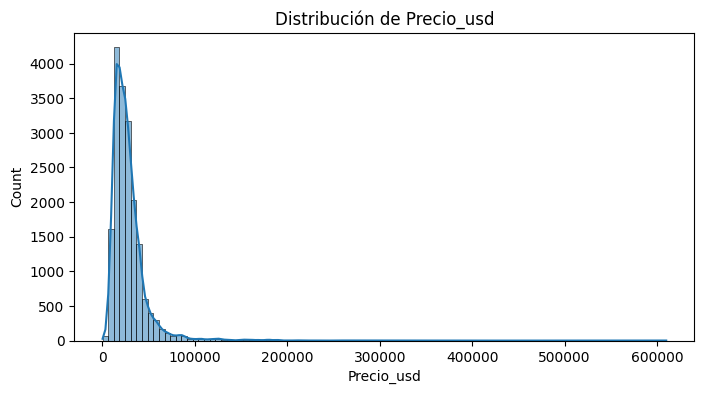

Outliers detectados: 935 filas


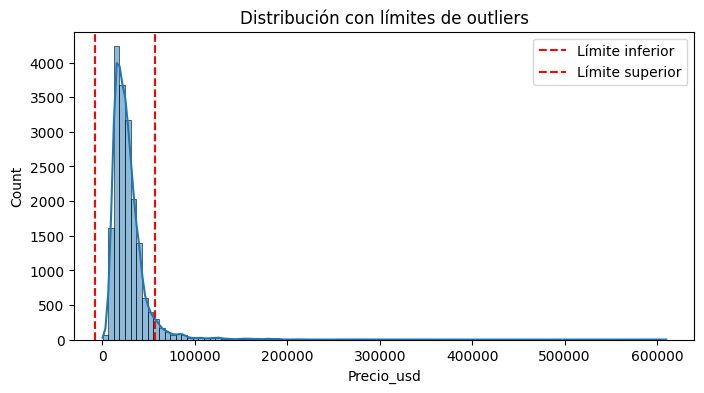

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
# Histograma del precio
plt.figure(figsize=(8, 4))
sns.histplot(df['Precio_usd'], bins=100, kde=True)
plt.title('Distribución de Precio_usd')
plt.show()


Q1 = df['Precio_usd'].quantile(0.25)
Q3 = df['Precio_usd'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df[(df['Precio_usd'] < limite_inferior) | (df['Precio_usd'] > limite_superior)]

print(f"Outliers detectados: {outliers.shape[0]} filas")

plt.figure(figsize=(8, 4))
sns.histplot(df['Precio_usd'], bins=100, kde=True)
plt.axvline(limite_inferior, color='red', linestyle='--', label='Límite inferior')
plt.axvline(limite_superior, color='red', linestyle='--', label='Límite superior')
plt.title('Distribución con límites de outliers')
plt.legend()
plt.show()

In [24]:
# Configurar pandas para mostrar todo en la terminal
import pandas as pd

pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.max_rows', None)     # Mostrar todas las filas
pd.set_option('display.width', None)        # Evitar saltos de línea horizontales
pd.set_option('display.max_colwidth', None) # Mostrar texto largo completo

# Cálculo de límites IQR
Q1 = df['Precio_usd'].quantile(0.15)
Q3 = df['Precio_usd'].quantile(0.85)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar outliers
outliers = df[(df['Precio_usd'] < limite_inferior) | (df['Precio_usd'] > limite_superior)]

# Mostrar cantidad y contenido completo en terminal
print(f"Outliers detectados: {outliers.shape[0]} filas")
print(outliers.to_string(index=True))  # <- esto lo imprime completo

Outliers detectados: 437 filas
          Año  Puertas  Con cámara de retroceso  Kilómetros     Precio_usd  Marca_Alfa Romeo  Marca_Audi  Marca_BAIC  Marca_BMW  Marca_Chery  Marca_Chevrolet  Marca_Citroën  Marca_DS  Marca_Daihatsu  Marca_Dodge  Marca_Fiat  Marca_Ford  Marca_GWM  Marca_Haval  Marca_Honda  Marca_Hyundai  Marca_Isuzu  Marca_JAC  Marca_Jaguar  Marca_Jeep  Marca_Jetour  Marca_Jetur  Marca_KAIYI  Marca_Kia  Marca_LandRover  Marca_Lexus  Marca_Lifan  Marca_Mercedes-Benz  Marca_Mini  Marca_Mitsubishi  Marca_Nissan  Marca_Peugeot  Marca_Porsche  Marca_Renault  Marca_SsangYong  Marca_Subaru  Marca_Suzuki  Marca_Toyota  Marca_Volkswagen  Marca_Volvo  Traccion_2WD  Traccion_4M  Traccion_4x2  Traccion_4x4  Traccion_AWD  Traccion_Desconocida  Traccion_FWD  Color_Blanco  Color_Color  Color_Desconocido  Color_Gris  Color_Negro  Modelo_2008  Modelo_C4 Cactus  Modelo_CR-V  Modelo_Captur  Modelo_Compass  Modelo_Corolla Cross  Modelo_Duster  Modelo_Ecosport  Modelo_HR-V  Modelo_Hilux SW4  